In [1]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.3 MB/s eta 0:00:0000:01


# Embeddings

In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [5]:
m = SentenceTransformer("shibing624/text2vec-base-multilingual")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/88.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
df = pd.read_csv("/kaggle/input/overall-80k/overall_80K.csv", index_col=0)

sentences = list(df['source'])
sentences

['Те мальчики не выполнят задание в назначенный срок.',
 'Бегая к берегу озера пришла, к воде подбежала. ',
 'Вода прибывала на глазах ',
 'Обнюхивает нас, живыми на кладбище уносит. ',
 'Мы никогда не забудем этого честного человека.',
 'Невод зацепился по среди реки ',
 'Черех дорогу перелетел рябчик. ',
 'Едет на оленьей упряжке, слышит, кто-то напротив кладбища плачет.',
 'Вот эта хорошая шуба, вообще как белый снег. ',
 'Выкопал могилу - такая красивая девушка.',
 'Если кто подпалится, тому жить нельзя.',
 'Бежит и думает, почему же шуба такая малая стала. ',
 '"Не трогай меня, - говорит девушка, - меня Атайпеква обнюхала, сюда привела и похоронила.',
 'Села у воды, себя рассматривает. ',
 'Мужчина взял её и увёз домой.',
 'Привёз её домой.',
 'Дальше побежала, бегая эту шкуру скинуть хотела, но не может. ',
 'Жители селения жалуются: "У нас Атайпеква появилась, скоро все скончаемся.',
 'И думает: - Теперь как в такой одежде к людям появлюсь? ',
 'Живыми в лес уносит, хоронит (жив

In [9]:
sentence_embeddings = m.encode(sentences)
print("Sentence embeddings:")
print(sentence_embeddings)

Batches:   0%|          | 0/2536 [00:00<?, ?it/s]

Sentence embeddings:
[[ 0.0678113   0.29819164 -0.10861283 ... -0.0939333  -0.05198468
   0.12225602]
 [ 0.41907024  0.40344918  0.0393868  ... -0.02934921 -0.07208424
   0.3070421 ]
 [ 0.15343784  0.17037435  0.11813661 ... -0.03212208 -0.09258149
   0.31556964]
 ...
 [ 0.12504758  0.03310306  0.17714143 ... -0.03621861  0.12228493
   0.03155504]
 [ 0.14083126  0.19648142 -0.05746074 ... -0.10249291 -0.11658277
  -0.06361137]
 [ 0.26676062 -0.03322189  0.12219451 ...  0.0522923  -0.02556843
   0.14066958]]


# Clustering

Сначала определим число кластеров, для этого воспользуемся понижением размерности и визуализируем результат

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [13]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(sentence_embeddings)

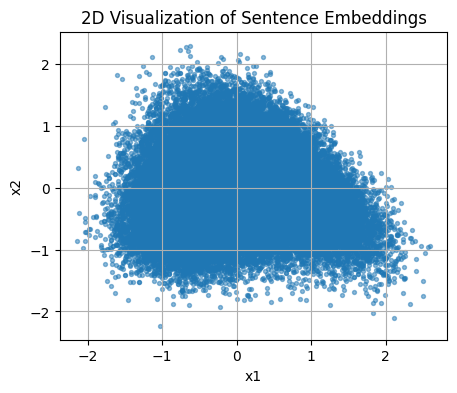

In [20]:
plt.figure(figsize=(5, 4))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],alpha=0.5, s=8)
plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

In [23]:
df['embedding'] = sentence_embeddings.tolist()

In [46]:
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10).fit(sentence_embeddings)

Теперь придумаем имена для каждого из кластеров, для этого посмотрим топ-слова в каждом кластере и предложения в каждом кластере

In [47]:
df['cluster'] = kmeans.labels_
df

,target,source,embedding,cluster,tokens
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат верм...,Те мальчики не выполнят задание в назначенный ...,"[0.06781130284070969, 0.298191636800766, -0.10...",6,"[те, мальчики, не, выполнят, задание, в, назна..."
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.","[0.4190702438354492, 0.4034491777420044, 0.039...",8,"[бегая, к, берегу, озера, пришла, к, воде, под..."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,"[0.15343783795833588, 0.17037434875965118, 0.1...",8,"[вода, прибывала, на, глазах]"
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.","[0.2093510627746582, 0.33963027596473694, -0.1...",3,"[обнюхивает, нас, живыми, на, кладбище, уносит]"
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёр...",Мы никогда не забудем этого честного человека.,"[-0.028139255940914154, 0.539676308631897, -0....",2,"[мы, никогда, не, забудем, этого, честного, че..."
...,...,...,...,...,...
2345,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄...,"Мне кажется, что подобные случаи могут вызыват...","[0.07286306470632553, 0.0785885751247406, -0.1...",3,"[мне, кажется, что, подобные, случаи, могут, в..."
2346,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,"[-0.05262450873851776, 0.21062739193439484, -0...",17,"[волосы, аккуратно, собраны, сзади]"
2347,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления мед...","[0.12504757940769196, 0.03310306370258331, 0.1...",14,"[в, общем, культуры, интенсивного, потребления..."
2348,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэ...",Затем Уэйтс отправился на гастроли с такими му...,"[0.14083126187324524, 0.19648142158985138, -0....",9,"[затем, уэйтс, отправился, на, гастроли, с, та..."


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.corpus import stopwords

In [49]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
def preprocess_and_tokenize(text):
    # Remove punctuation and lower the text
    text = re.sub(r'[^\w\s]', '', text.lower())
    return word_tokenize(text)

In [51]:
df['tokens'] = df['source'].apply(preprocess_and_tokenize)

In [52]:
def get_top_words(cluster_df, n=10):
    # Flatten the list of tokens for the cluster and filter words longer than 3 characters
    russian_stopwords = set(stopwords.words('russian'))
    all_words = [word for tokens in cluster_df['tokens'] for word in tokens if len(word) > 3 and \
                 word not in russian_stopwords]
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

In [53]:
top_words_per_cluster = {}
for cluster in range(num_clusters):  # Assuming 10 clusters
    cluster_df = df[df['cluster'] == cluster]
    top_words_per_cluster[cluster] = get_top_words(cluster_df, n=10)

# Display the most used words in each cluster
for cluster, words in top_words_per_cluster.items():
    print(f"Cluster {cluster}: {words}")

Cluster 0: [('люди', 284), ('деревне', 220), ('дома', 203), ('деревни', 202), ('людей', 191), ('живут', 185), ('городе', 161), ('деревня', 158), ('очень', 150), ('году', 148)]
Cluster 1: [('пусть', 368), ('говорит', 140), ('тебе', 133), ('дальше', 132), ('жить', 105), ('туда', 80), ('нужно', 76), ('сюда', 74), ('вместе', 70), ('живут', 67)]
Cluster 2: [('мужчина', 351), ('отец', 286), ('человек', 203), ('говорит', 193), ('брат', 164), ('очень', 133), ('отца', 132), ('родился', 119), ('сказал', 118), ('сына', 113)]
Cluster 3: [('очень', 123), ('мужчина', 89), ('говорит', 87), ('сердце', 83), ('стал', 72), ('люди', 72), ('человек', 62), ('сильно', 60), ('кричит', 59), ('сказал', 52)]
Cluster 4: [('люди', 122), ('махум', 113), ('людей', 107), ('день', 104), ('очень', 98), ('маньщи', 85), ('урыл', 85), ('году', 81), ('порат', 73), ('ханты', 70)]
Cluster 5: [('году', 461), ('россии', 234), ('района', 220), ('городе', 219), ('года', 218), ('работает', 197), ('наталья', 190), ('деревне', 187)

In [69]:
df[df['cluster'] == 7].head(30)

,target,source,embedding,cluster,tokens
28,Тав нупылэ сэ̄мыл пуныӈ вильтсов тӯлмах сунсы.,На неё чёрная шерстистая мордочка росомахи смо...,"[0.05326830595731735, 0.10951616615056992, -0....",7,"[на, неё, чёрная, шерстистая, мордочка, росома..."
40,"На матыр та васыӈ, анумн туйтэгын","Ты что то видел, от меня скрываешь?","[-0.05048143118619919, 0.28744179010391235, -0...",7,"[ты, что, то, видел, от, меня, скрываешь]"
92,О̄с хотталь О̄выл-па̄выл нупыл та туйтхатыглам...,И куда-то в сторону Овыл-павыла они прятались.,"[0.04930315539240837, 0.45850783586502075, -0....",7,"[и, кудато, в, сторону, овылпавыла, они, прята..."
111,Тыг вос суйтнув.,Эту мольбу пусть уловит твой слух.,"[0.022514427080750465, 0.16336536407470703, -0...",7,"[эту, мольбу, пусть, уловит, твой, слух]"
135,Тамле ӯратпа тэл о̄ньсяс.,"Такой оберег, видимо, имел.","[0.031734175980091095, 0.32520169019699097, -0...",7,"[такой, оберег, видимо, имел]"
162,А̄сын кēлы со̄рни самын.,"Твой золотой глаз, отражающийся в Оби.","[0.08194529265165329, 0.1667197346687317, -0.1...",7,"[твой, золотой, глаз, отражающийся, в, оби]"
167,А̄гириськве ла̄ви:- Ам наӈын самн патхатнэ хур...,"Девочка отвечает: - У меня не такой вид, чтобы...","[0.017696065828204155, 0.100277841091156, 0.20...",7,"[девочка, отвечает, у, меня, не, такой, вид, ч..."
181,"А̄гитэ тактēтэ хультыс, ты ла̄тӈыт номсым та ӯ...","Дочь осталась одна в лесу, припоминая, думая о...","[-0.17526067793369293, 0.07153584063053131, 0....",7,"[дочь, осталась, одна, в, лесу, припоминая, ду..."
190,"Ань хум колкан котильн йис, ла̄ви:- Таяныт ёма...","Мужчина дошёл до середины пола, говорит: - Сде...","[0.12847018241882324, 0.23351721465587616, -0....",7,"[мужчина, дошёл, до, середины, пола, говорит, ..."
197,"Хоса то̄рум олэгын, сав сунсэгын",Проживешь долгую жизнь- многое усеешь увидеть.,"[0.21130187809467316, 0.11079590767621994, -0....",7,"[проживешь, долгую, жизнь, многое, усеешь, уви..."


In [55]:
df

,target,source,embedding,cluster,tokens
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат верм...,Те мальчики не выполнят задание в назначенный ...,"[0.06781130284070969, 0.298191636800766, -0.10...",6,"[те, мальчики, не, выполнят, задание, в, назна..."
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.","[0.4190702438354492, 0.4034491777420044, 0.039...",8,"[бегая, к, берегу, озера, пришла, к, воде, под..."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,"[0.15343783795833588, 0.17037434875965118, 0.1...",8,"[вода, прибывала, на, глазах]"
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.","[0.2093510627746582, 0.33963027596473694, -0.1...",3,"[обнюхивает, нас, живыми, на, кладбище, уносит]"
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёр...",Мы никогда не забудем этого честного человека.,"[-0.028139255940914154, 0.539676308631897, -0....",2,"[мы, никогда, не, забудем, этого, честного, че..."
...,...,...,...,...,...
2345,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄...,"Мне кажется, что подобные случаи могут вызыват...","[0.07286306470632553, 0.0785885751247406, -0.1...",3,"[мне, кажется, что, подобные, случаи, могут, в..."
2346,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,"[-0.05262450873851776, 0.21062739193439484, -0...",17,"[волосы, аккуратно, собраны, сзади]"
2347,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления мед...","[0.12504757940769196, 0.03310306370258331, 0.1...",14,"[в, общем, культуры, интенсивного, потребления..."
2348,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэ...",Затем Уэйтс отправился на гастроли с такими му...,"[0.14083126187324524, 0.19648142158985138, -0....",9,"[затем, уэйтс, отправился, на, гастроли, с, та..."


In [56]:
df.to_csv('data_w_clusters.csv')

In [58]:
from IPython.display import FileLink
FileLink('data_w_clusters.csv')

/kaggle/working/data_w_clusters.csv

In [4]:
import pandas as pd
df = pd.read_csv('data_w_clusters.csv', index_col=0)
df = df.drop(['target', 'tokens', 'embedding'], axis=1)
df

,source,cluster
0,Те мальчики не выполнят задание в назначенный ...,6
1,"Бегая к берегу озера пришла, к воде подбежала.",8
2,Вода прибывала на глазах,8
3,"Обнюхивает нас, живыми на кладбище уносит.",3
4,Мы никогда не забудем этого честного человека.,2
...,...,...
2345,"Мне кажется, что подобные случаи могут вызыват...",3
2346,Волосы аккуратно собраны сзади.,17
2347,"В общем, культуры интенсивного потребления мед...",14
2348,Затем Уэйтс отправился на гастроли с такими му...,9


In [5]:
df.to_csv('sent_cluster.csv')